In [2]:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler

# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score

# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

# Algoritmo SVM
from sklearn import svm
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
     

In [3]:
df = pd.read_csv('datasets/datasetIBM.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [34]:
col_categoricas = df.select_dtypes(exclude=np.number).columns
col_numericas = df.select_dtypes(include=np.number).columns

In [36]:
for i in col_categoricas:
    print(f"\n - {i} \n")
    print(df[i].value_counts())


 - Attrition 

Attrition
No     1233
Yes     237
Name: count, dtype: int64

 - BusinessTravel 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

 - Department 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

 - EducationField 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

 - Gender 

Gender
Male      882
Female    588
Name: count, dtype: int64

 - JobRole 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

 - MaritalStat

Analisando a frequência de viagens a trabalho com a taxa de Turnover

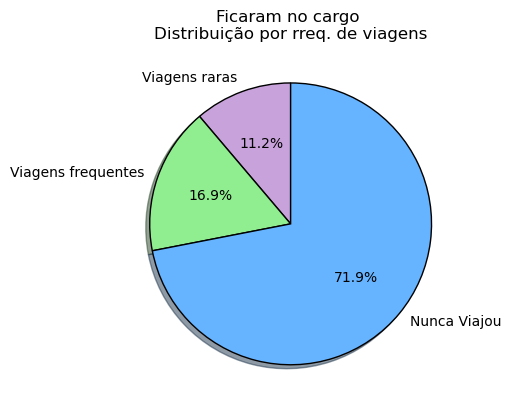

In [43]:
contagem_attrition = df.groupby(['BusinessTravel', 'Attrition'])['BusinessTravel'].count()


saiu_no_cargo = contagem_attrition.xs('Yes', level='Attrition')
ficou_no_cargo = contagem_attrition.xs('No', level='Attrition')

colors = ['#C8A2DB', '#90EE90', '#66B3FF']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(ficou_no_cargo, 
        labels=['Viagens raras', 'Viagens frequentes', 'Nunca Viajou'], 
        colors=colors, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'}, 
        shadow=True)
plt.title('Ficaram no cargo \nDistribuição por rreq. de viagens')

plt.savefig('separacao_por_viagem.png')
plt.show()


Dessa vez, fazendo a proporção

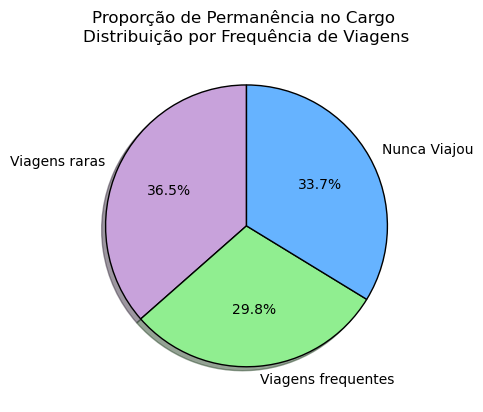

In [44]:
# contagem total de funcionários por categoria de viagens
contagem_total = df.groupby('BusinessTravel')['Attrition'].count()

# contagens dos que ficaram no cargo
ficou_no_cargo = contagem_attrition.xs('No', level='Attrition')

# calculo da proporção dos que ficaram no cargo em cada categoria
proporcao_ficou = ficou_no_cargo / contagem_total

colors = ['#C8A2DB', '#90EE90', '#66B3FF']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(proporcao_ficou, 
        labels=['Viagens raras', 'Viagens frequentes', 'Nunca Viajou'], 
        colors=colors, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'}, 
        shadow=True)
plt.title('Proporção de Permanência no Cargo \nDistribuição por Frequência de Viagens')

# Salvar e mostrar o gráfico
plt.savefig('separacao_por_viagem.png')
plt.show()


In [37]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# Filtrar apenas colunas do tipo 'object'
df_object_columns = df.select_dtypes(include=['object'])

# Mostrar o DataFrame filtrado
print(df_object_columns)

     Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus Over18 OverTime  
0     Female   

In [13]:
contagem_valores_job = df['JobRole'].value_counts()
print(contagem_valores_job)

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


In [14]:
contagem_valores_depto = df['Department'].value_counts()
print(contagem_valores_depto)

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [15]:
contagem_valores_edu = df['EducationField'].value_counts()
print(contagem_valores_edu)

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


In [16]:
contagem_valores_travel = df['BusinessTravel'].value_counts()
print(contagem_valores_travel)

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


In [20]:
contagem_valores_marital = df['MaritalStatus'].value_counts()
print(contagem_valores_marital)

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


### Aplicando técnicas de encoding
#### One Hot Encoding e Label Encoding

In [21]:
# One Hot Encoding nas colunas 'Attrition', 'MaritalStatus', e 'OverTime'
df_encoded = pd.get_dummies(df_novo, columns=['Attrition', 'MaritalStatus', 'OverTime'], drop_first=True)

# Label Encoding na coluna 'Gender'
label_encoder = LabelEncoder()
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])
print(df_encoded)


      Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2       0          94   
1                  2                        3

In [22]:
df_encoded['MaritalStatus_Married'].head()

0    False
1     True
2    False
3     True
4     True
Name: MaritalStatus_Married, dtype: bool

In [23]:
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,0,94,3,...,0,1,6,4,0,5,True,False,True,True
1,49,279,8,1,1,2,3,1,61,2,...,3,3,10,7,1,7,False,True,False,False
2,37,1373,2,2,1,4,4,1,92,2,...,3,3,0,0,0,0,True,False,True,True
3,33,1392,3,4,1,5,4,0,56,3,...,3,3,8,7,3,0,False,True,False,True
4,27,591,2,1,1,7,1,1,40,3,...,3,3,2,2,2,2,False,True,False,False


Text(0.5, 1.0, 'Relação da taxa de empregados que ficaram(no-em attrition) e saíram do cargo(yes-attrition)')

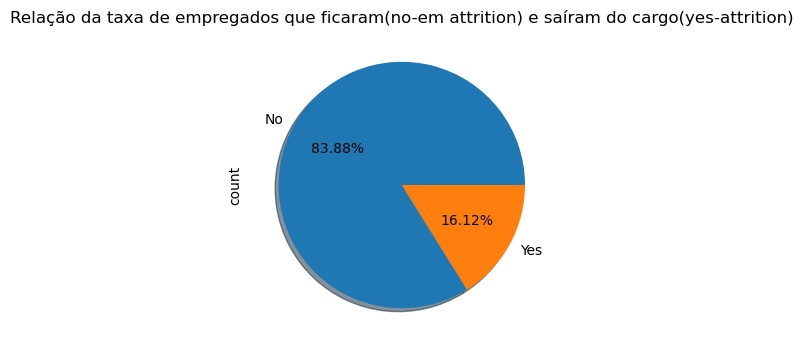

In [51]:
plt.figure(figsize = [4, 4], clear = True)
df["Attrition"].value_counts().plot.pie( autopct='%1.2f%%', shadow = True)
plt.title("Relação da taxa de empregados que ficaram(no-em attrition) e saíram do cargo(yes-attrition)")

### Univariate Analysis

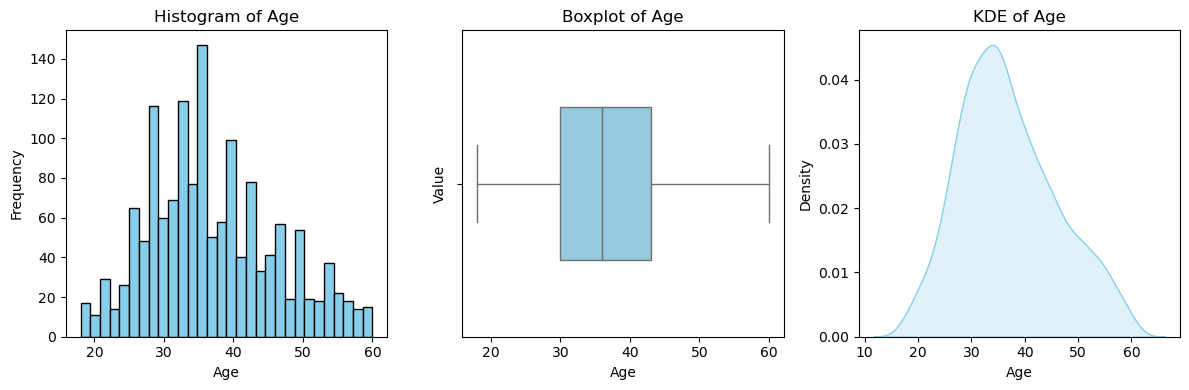

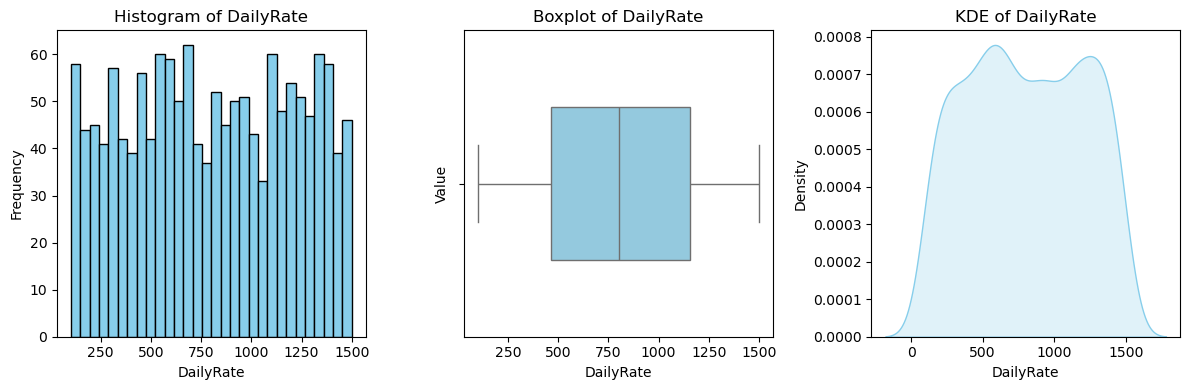

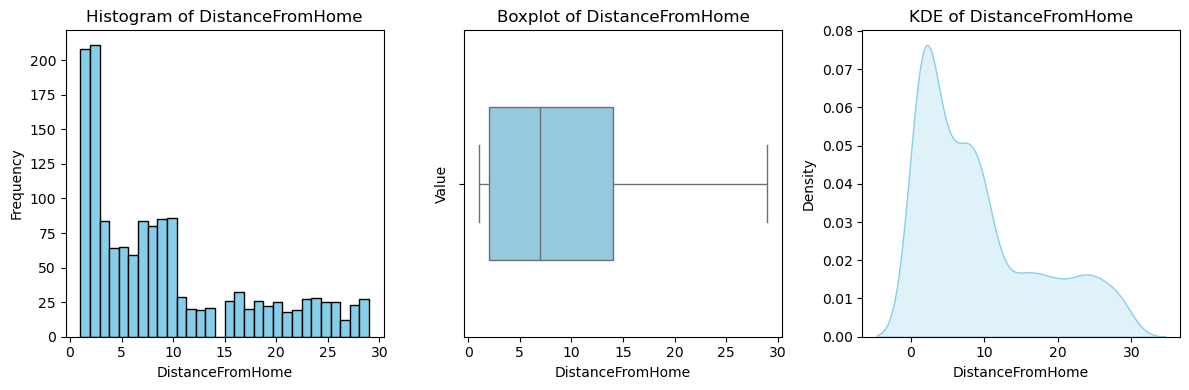

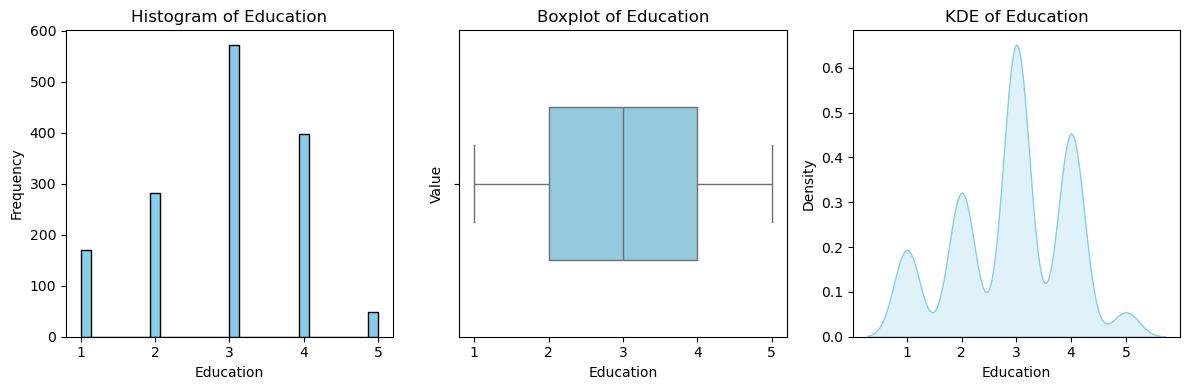

C:\Users\User\AppData\Local\Temp\ipykernel_9252\2839380182.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], color='skyblue', fill=True)


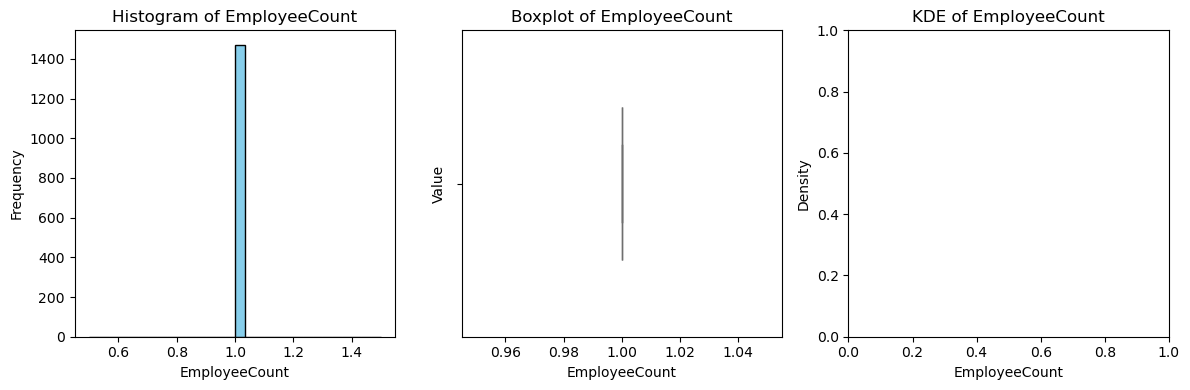

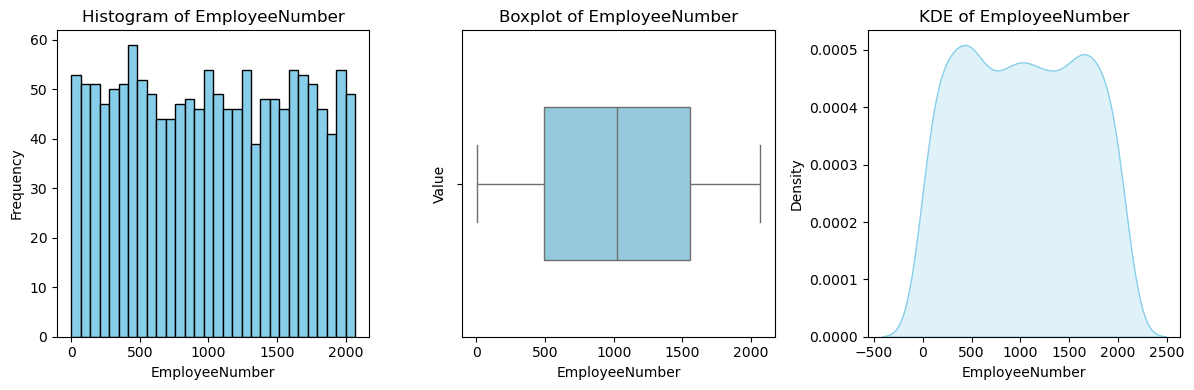

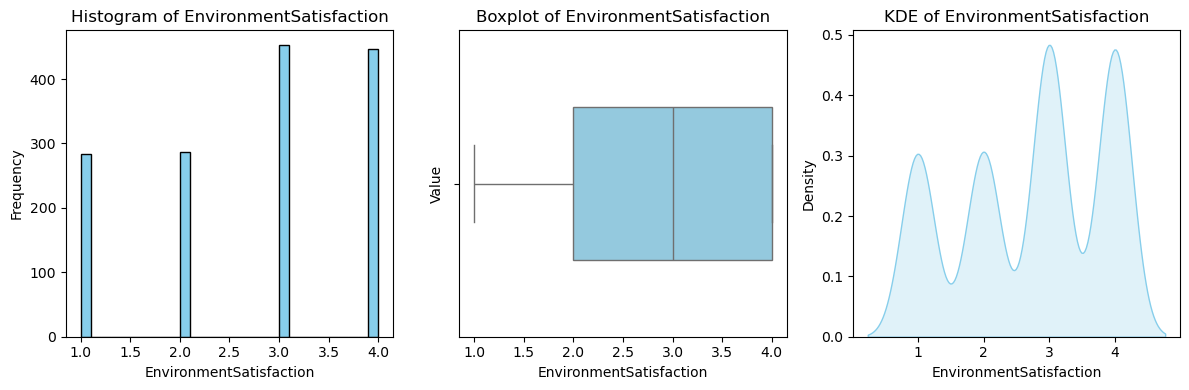

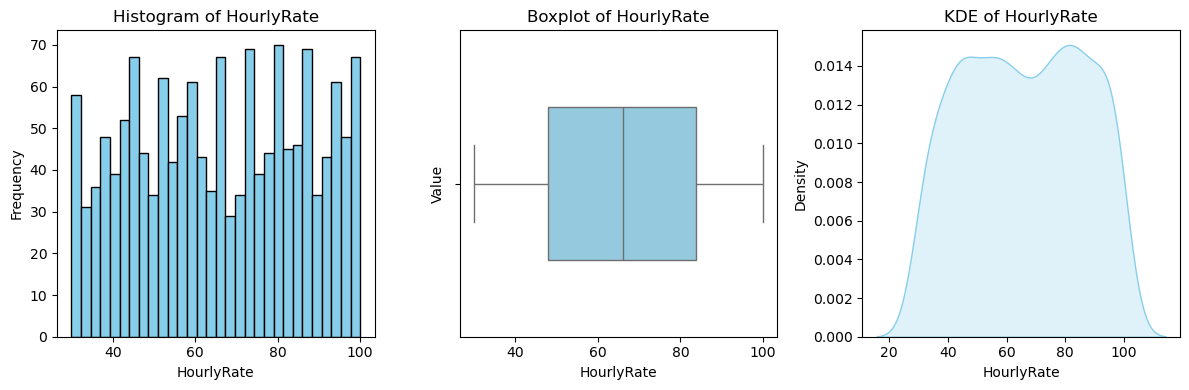

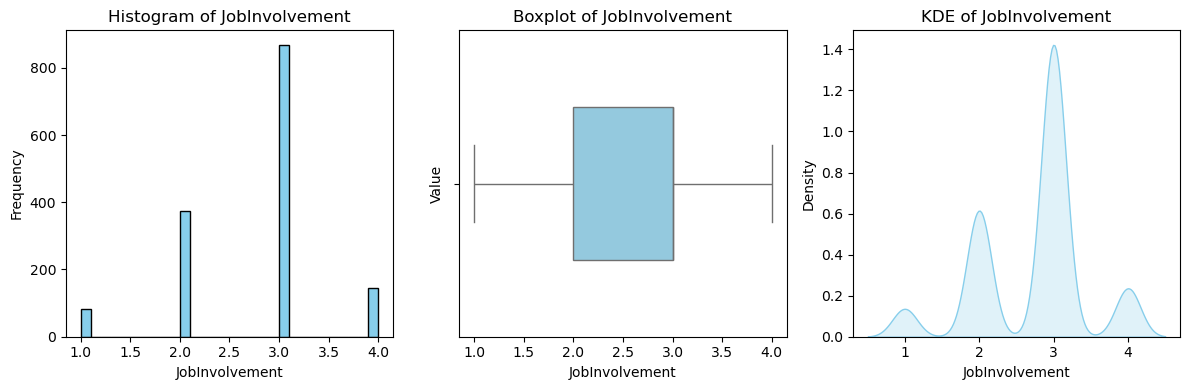

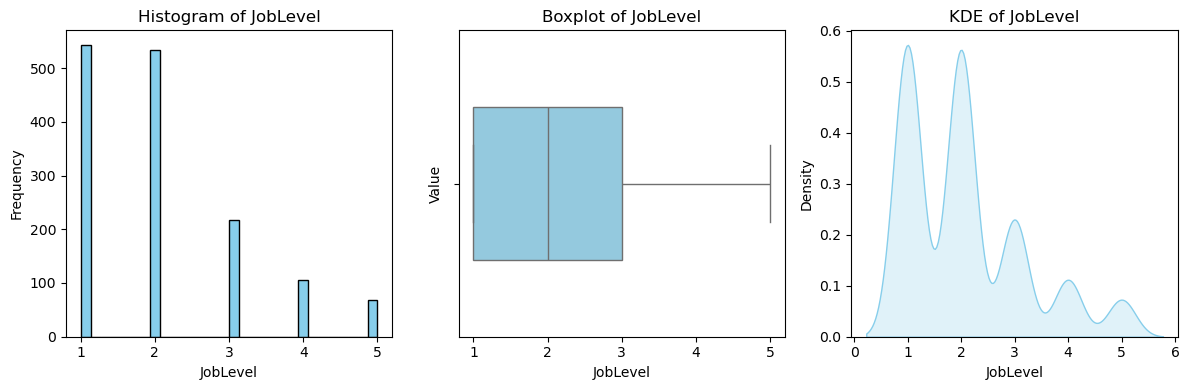

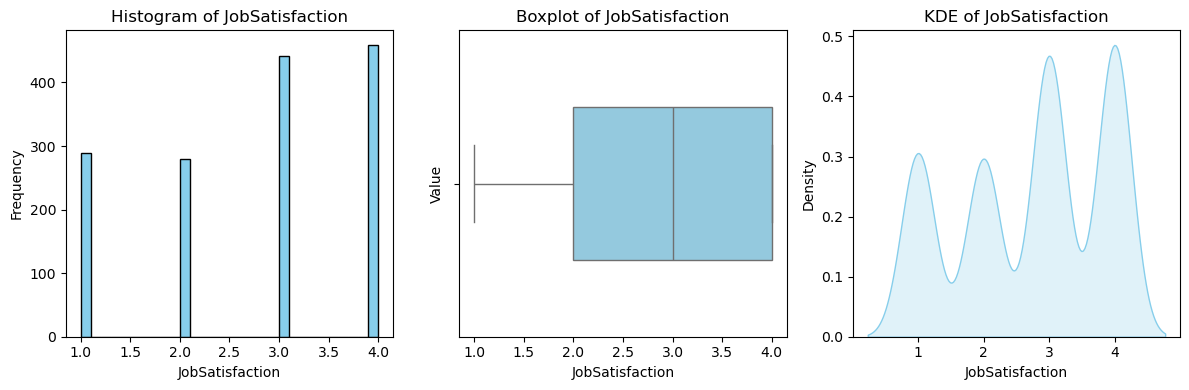

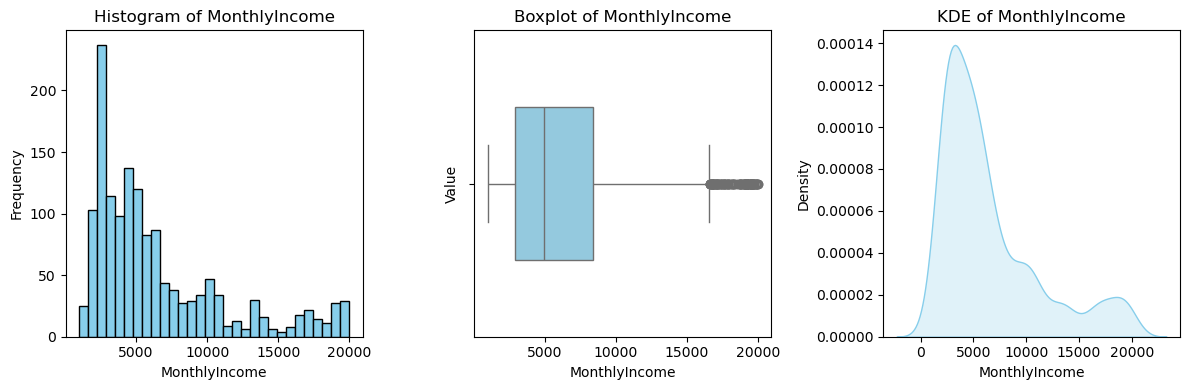

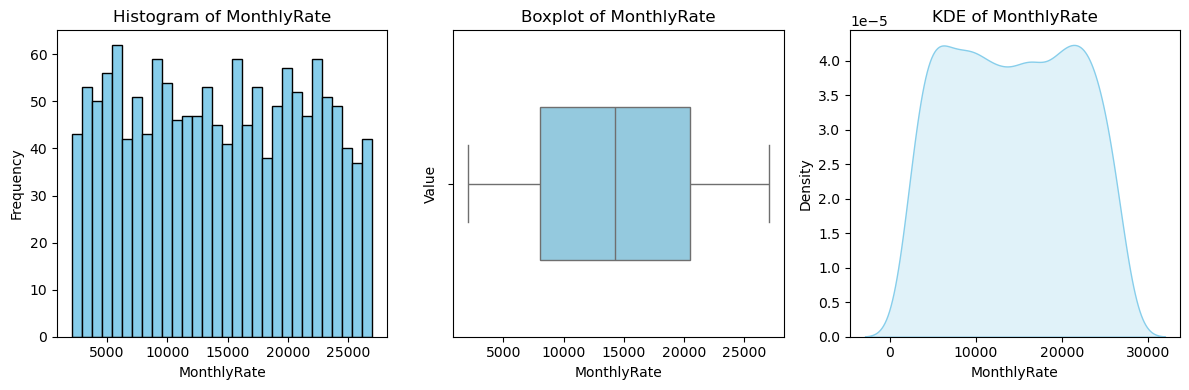

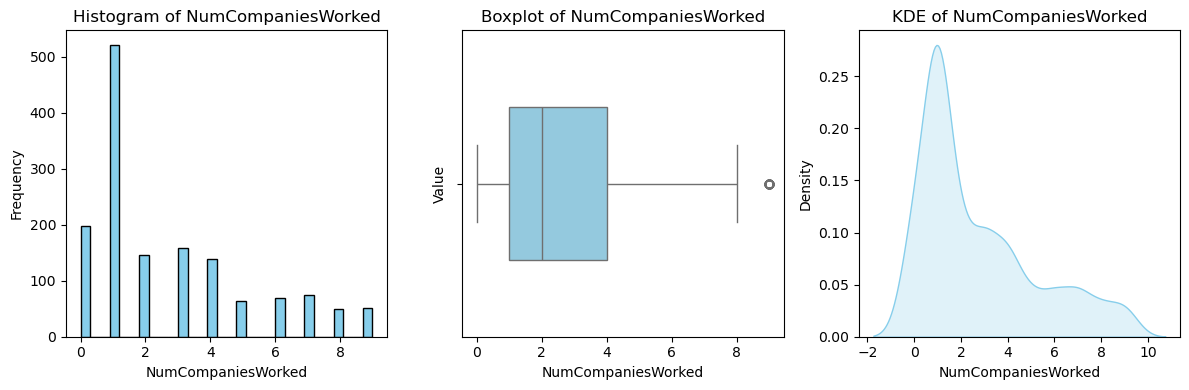

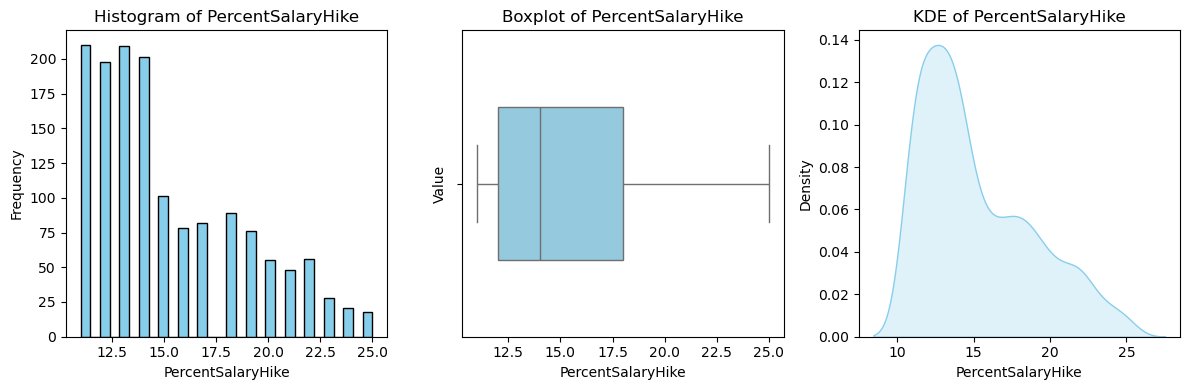

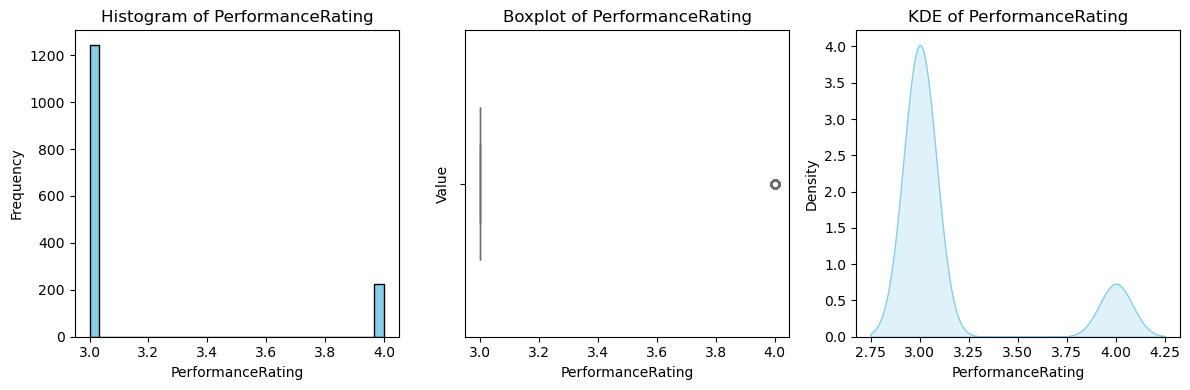

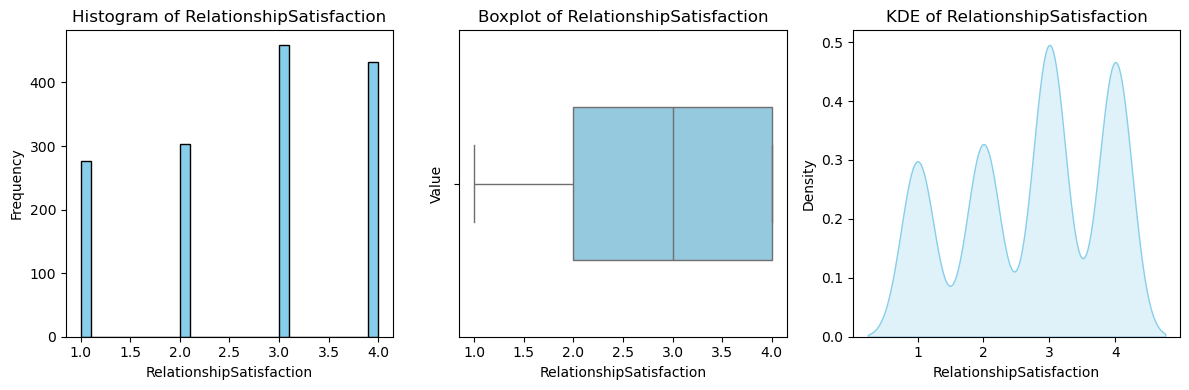

C:\Users\User\AppData\Local\Temp\ipykernel_9252\2839380182.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], color='skyblue', fill=True)


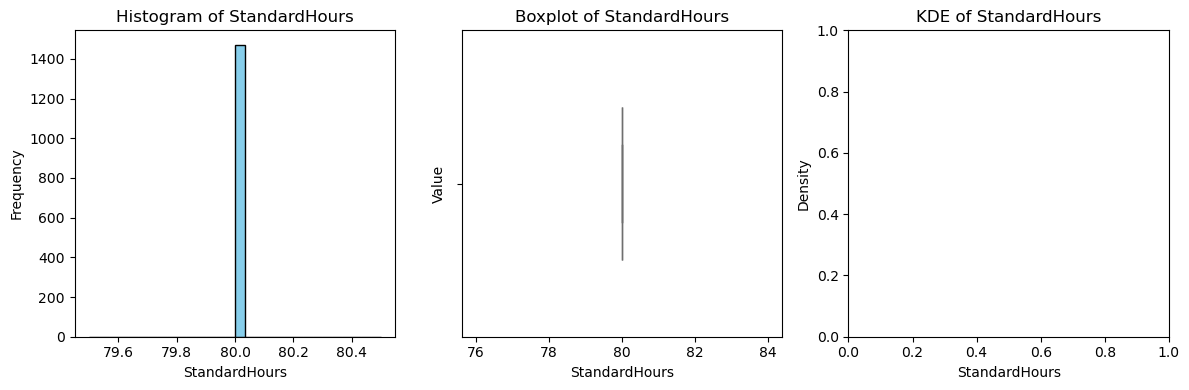

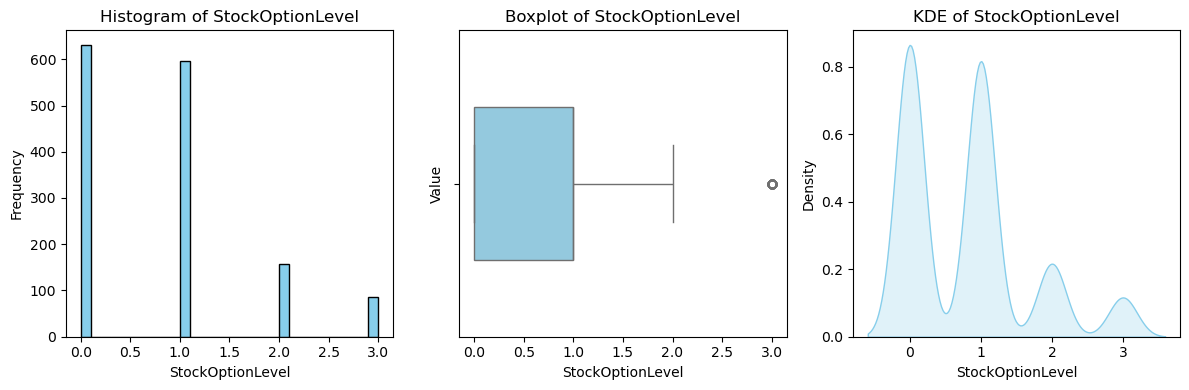

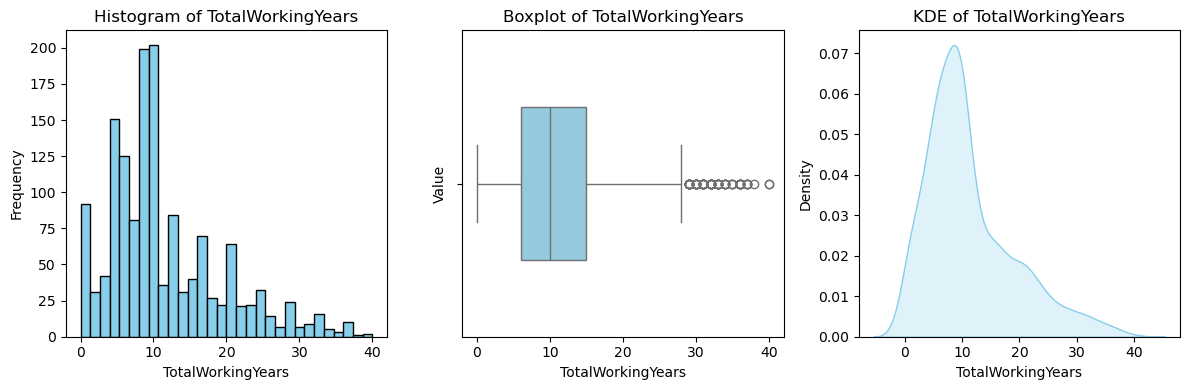

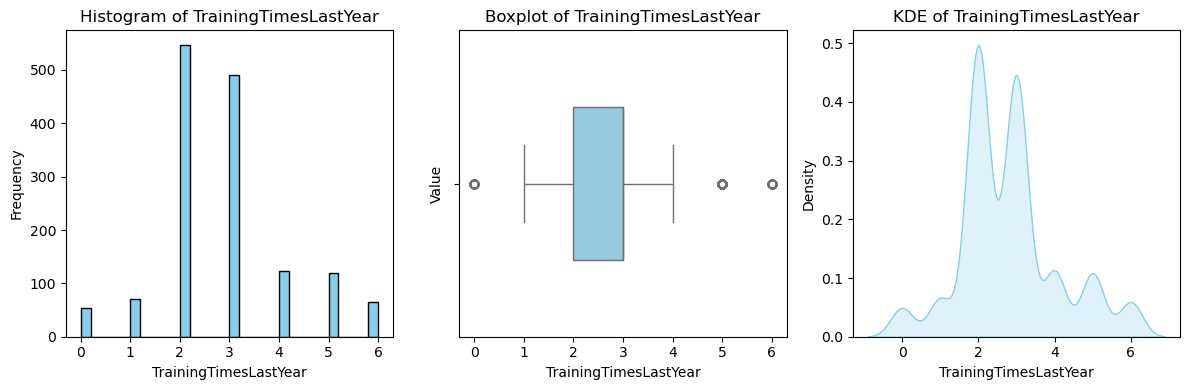

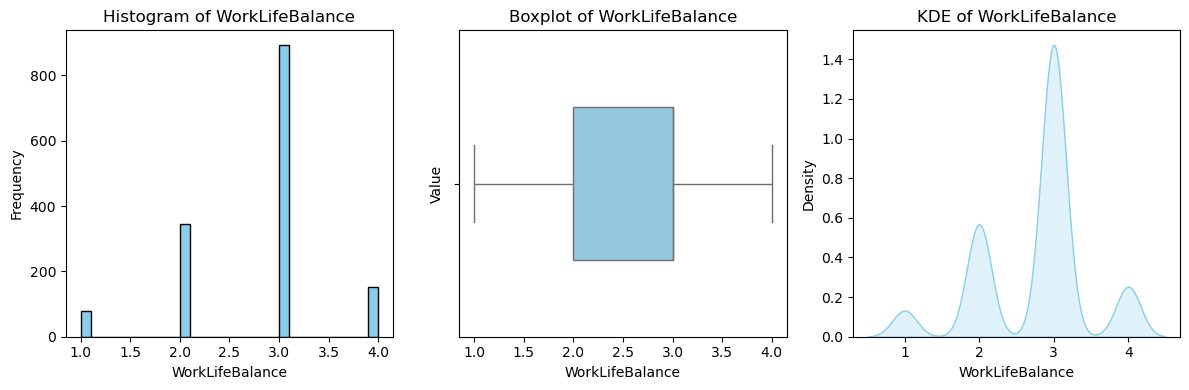

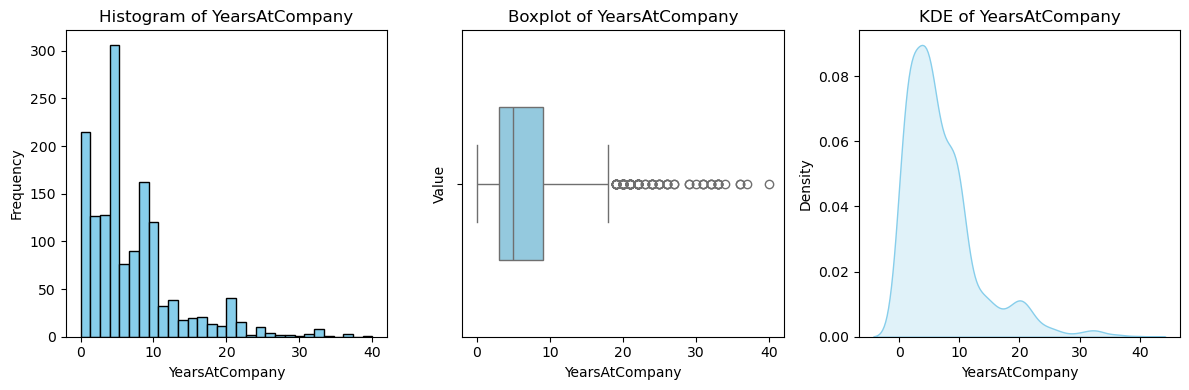

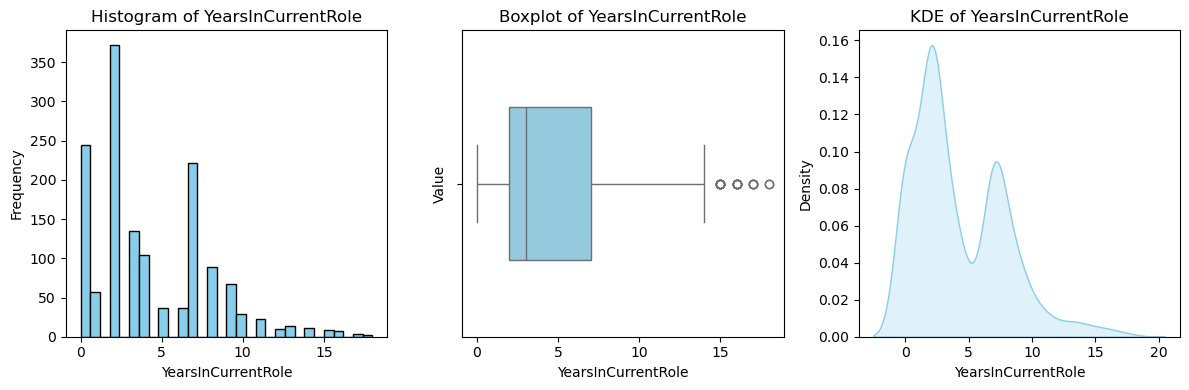

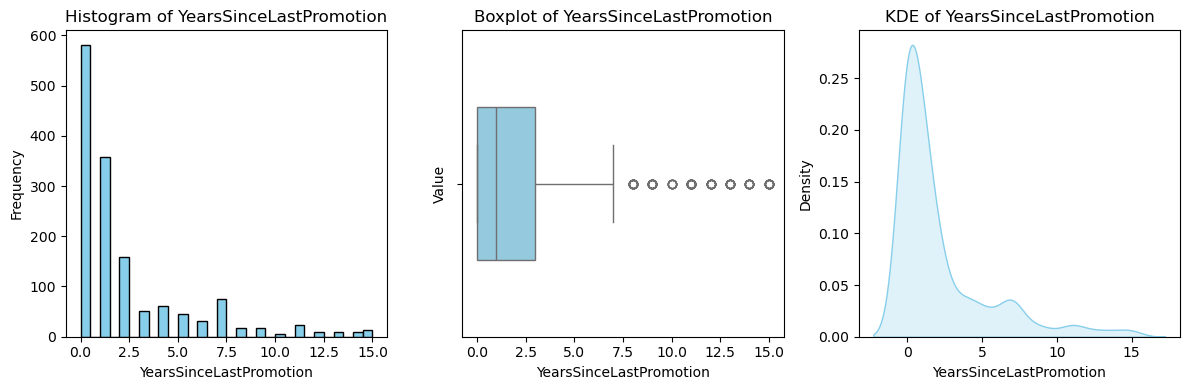

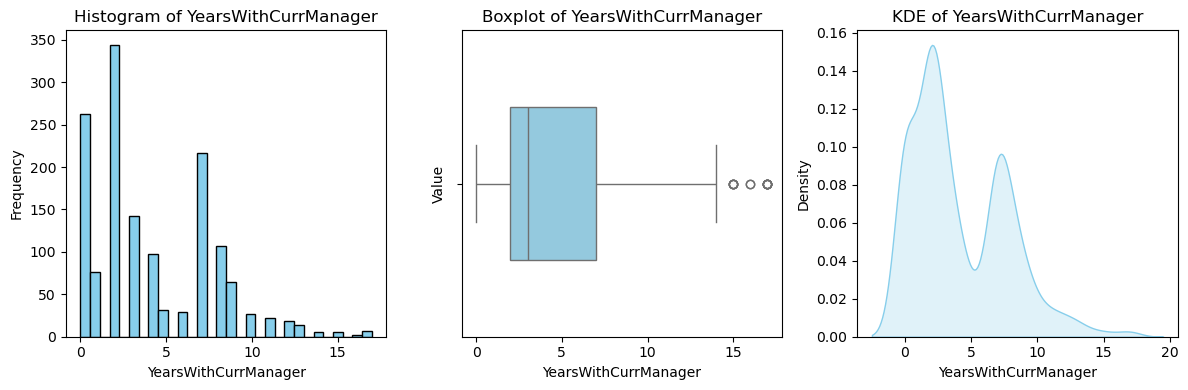

In [25]:
num_colunas = df.select_dtypes(include=np.number).columns
numerical_data = df[num_colunas]
for col in numerical_data[1:]:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='skyblue', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], color='skyblue', fill=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col}')

    plt.tight_layout()
    plt.show()



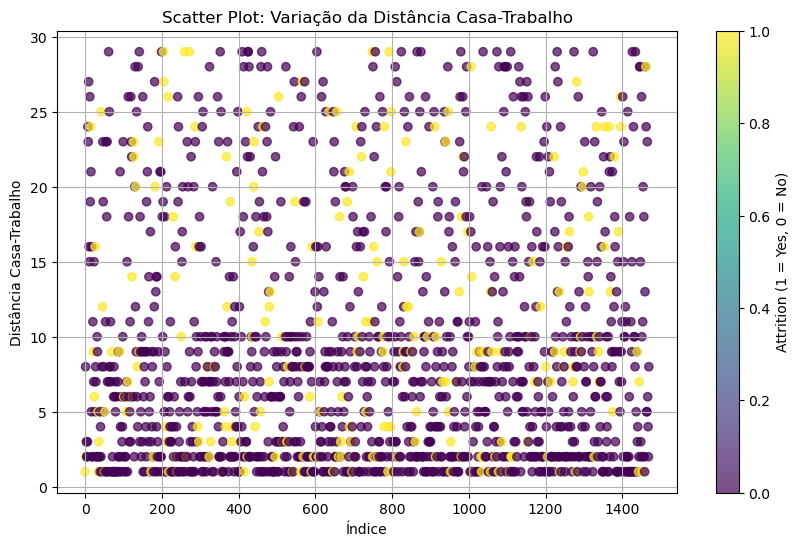

In [26]:
# Scatter plot de uma variável só
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['DistanceFromHome'], c=df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0), alpha=0.7)
plt.title('Scatter Plot: Variação da Distância Casa-Trabalho')
plt.xlabel('Índice')
plt.ylabel('Distância Casa-Trabalho')
plt.grid(True)
plt.colorbar(label='Attrition (1 = Yes, 0 = No)')  
plt.show()


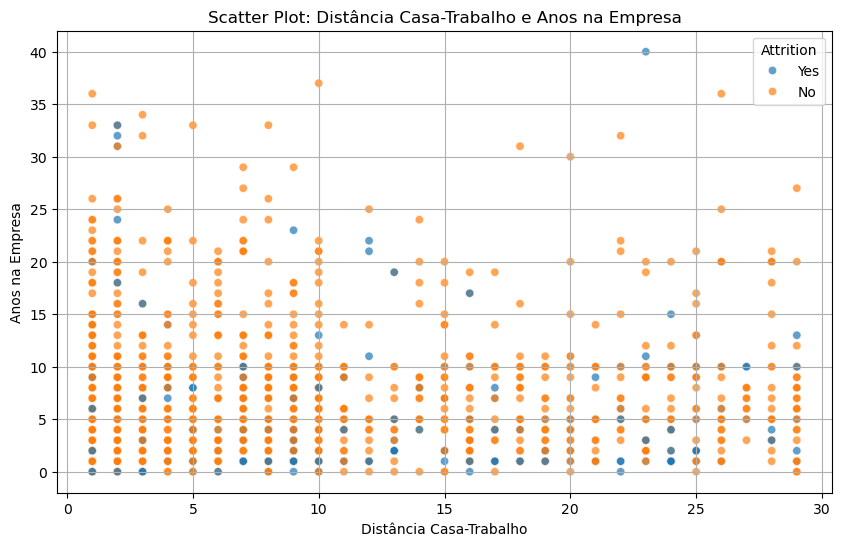

In [27]:
# scatter plot com duas variaveis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DistanceFromHome', y='YearsAtCompany', hue='Attrition', alpha=0.7)
plt.title('Scatter Plot: Distância Casa-Trabalho e Anos na Empresa')
plt.xlabel('Distância Casa-Trabalho')
plt.ylabel('Anos na Empresa')
plt.grid(True)
plt.show()


In [28]:
df_encoded.columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

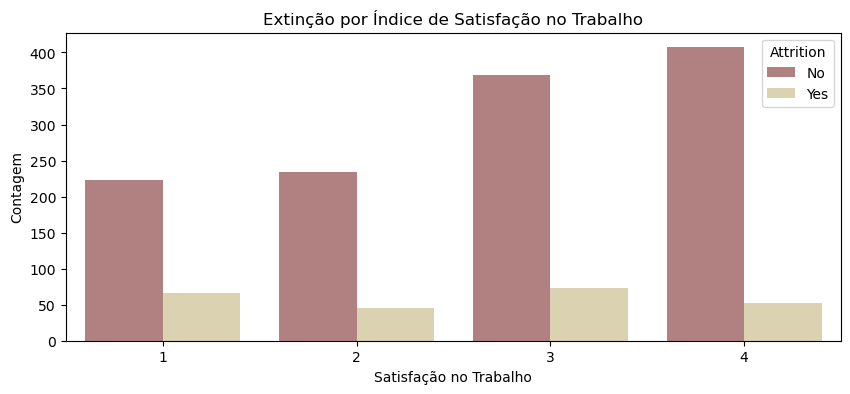

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x="JobSatisfaction", hue="Attrition", data=df, palette='pink')
plt.title("Extinção por Índice de Satisfação no Trabalho")
plt.xlabel("Satisfação no Trabalho")
plt.ylabel("Contagem")
plt.show()

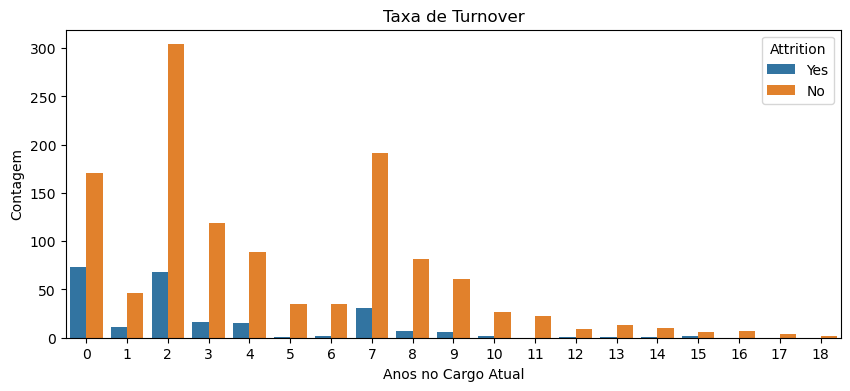

In [30]:
plt.figure(figsize=(10, 4))
sns.countplot(x="YearsInCurrentRole", hue="Attrition", data=df)

# Títulos do gráfico e dos eixos
plt.title("Taxa de Turnover")
plt.xlabel("Anos no Cargo Atual")
plt.ylabel("Contagem")              
plt.show()
